In [7]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [4]:
# Get underlying prices
spy = pd.read_csv("../data/raw/spy.csv", parse_dates=True, index_col=0)

In [5]:
# Get the working dataframe
ml_df = pd.read_csv("../data/processed/ml_df.csv", parse_dates=True, index_col=0)

In [6]:
ml_df

,QUOTE_DATE,EXPIRE_DATE,UNDERLYING_LAST,STRIKE,C_LAST,C_BID,C_ASK,C_IV,C_VOLUME,diff,diff_date
Date,,,,,,,,,,,
2018-01-02,2018-01-02,2018-01-24,268.81,269.0,1.56,1.72,1.76,0.07134,80.0,0.19,22
2018-01-03,2018-01-03,2018-01-24,270.47,270.0,2.15,2.10,2.15,0.07361,271.0,0.47,21
2018-01-04,2018-01-04,2018-01-24,271.56,272.0,1.67,1.57,1.61,0.06871,392.0,0.44,20
2018-01-05,2018-01-05,2018-01-26,273.41,273.0,2.21,2.23,2.28,0.07675,NaN,0.41,21
2018-01-08,2018-01-08,2018-01-31,273.94,274.0,2.08,2.07,2.09,0.07593,490.0,0.06,23
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,2022-12-23,2023-01-13,382.88,383.0,8.00,7.97,7.99,0.20485,594.0,0.12,21
2022-12-26,2022-12-26,2023-01-13,382.91,383.0,7.96,7.91,8.00,0.22174,603.0,0.09,18
2022-12-28,2022-12-28,2023-01-20,376.71,377.0,8.75,8.73,8.76,0.21881,807.0,0.29,23


In [10]:
# Create target
target = []
prev_price = 0.0
for row in tqdm(ml_df.itertuples(), total=len(ml_df)):
    # Get present quoattion
    start_price = row.UNDERLYING_LAST
    # Get expire date
    exp_date = pd.to_datetime(row.EXPIRE_DATE) 
    
    # Get price at expiration
    # Needed since a day in YF is missing
    try:
        final_price = spy.loc[exp_date, "Close"]
    except:
        final_price = prev_price
    prev_price = final_price
    # Buy or sell
    target.append(int(final_price> start_price))
    

  0%|          | 0/1253 [00:00<?, ?it/s]

In [13]:
assert len(target) == len(ml_df)

In [11]:
target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [14]:
import matplotlib.pyplot as plt

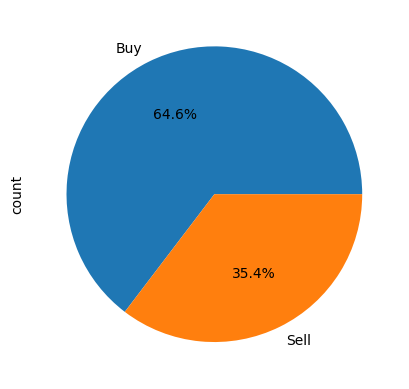

In [20]:
pd.Series(target).value_counts().plot(kind="pie", labels=["Buy", "Sell"], autopct='%1.1f%%');